# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.066776e+01     7.308318e+00
 * time: 0.0022940635681152344
     1     2.894102e+01     4.525412e+00
 * time: 0.008958101272583008
     2     2.007176e+01     4.364145e+00
 * time: 0.014512062072753906
     3     1.324253e+01     3.030484e+00
 * time: 0.020279884338378906
     4     1.099577e+01     1.372398e+00
 * time: 0.025288105010986328
     5     1.012923e+01     2.162239e+00
 * time: 0.029341936111450195
     6     9.640785e+00     1.078671e+00
 * time: 0.03374195098876953
     7     9.240500e+00     1.010471e+00
 * time: 0.03814697265625
     8     8.761910e+00     1.206835e+00
 * time: 0.04216790199279785
     9     8.484286e+00     7.782158e-01
 * time: 0.0464479923248291
    10     8.349164e+00     5.779438e-01
 * time: 0.05044198036193848
    11     8.249288e+00     5.790310e-01
 * time: 0.05491209030151367
    12     8.191215e+00     6.339809e-01
 * time: 0.058715105056762695
    13     8.105425e+00     4.393585e-01
 * t

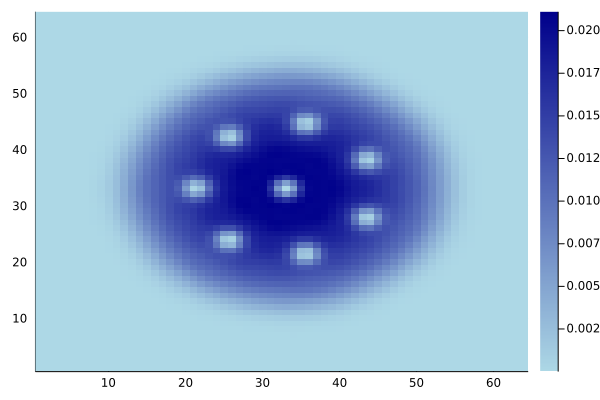

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)